# CS4186 Assignment 1: CNN model

Importing All Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.autograd import Variable
import cv2
import os
import numpy as np
import torchvision.models as models
import torchvision.transforms as transforms
from tqdm import tqdm
from matplotlib import pyplot as plt

from utils import query_crop, similarity_cosine, similarity_distance,similarity_pearson, visualization, retrival_idx

In [2]:
plt.rcParams["figure.figsize"] = (5,5)

Parameters

In [3]:
grayscale = False
generate_features = True
similarity = 'cosine'

## Helper Functions

In [4]:
def extraction(img, featsave_path):
    conv_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])])
    img_transform = conv_transform(img).to(device) #normalize the input image and transform it to tensor.
    
    img_transform = torch.unsqueeze(img_transform, 0) #Set batchsize as 1. You can enlarge the batchsize to accelerate.
    
    feats = cnn_model(img_transform) # extract feature
    feats_np = feats.cpu().detach().numpy() # convert tensor to numpy
    np.save(featsave_path, feats_np, allow_pickle=True) # save the featur

def feat_extractor_gallery(gallery_dir, feat_savedir):
    for img_file in tqdm(os.listdir(gallery_dir)):
        img = cv2.imread(os.path.join(gallery_dir, img_file))
        img = img[:,:,::-1] #bgr2rgb
        img_resize = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC) # resize the image
        if grayscale==True:
            img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2HSV)
        featsave_path = os.path.join(feat_savedir, img_file.split('.')[0]+'.npy')
        extraction(img_resize, featsave_path)

# Extract the query feature
def feat_extractor_query():
    query_dir = './datasets_4186/query_4186/'
    txt_dir = './datasets_4186/query_txt_4186/'
    save_dir =  './datasets_4186/query_cropped/'
    featsave_dir = './datasets_4186/query_feature/'
    for query_file in tqdm(os.listdir(query_dir)):
        if query_file.endswith(".DS_Store"):
            continue
        print(query_file)
        img_name = query_file[0:query_file.find('.')]
        txt_file = img_name+'.txt'
        featsave_file = img_name+'_feats.npy'
        query_path = os.path.join(query_dir, query_file)
        txt_path = os.path.join(txt_dir, txt_file)
        save_path = os.path.join(save_dir, query_file)
        featsave_path =os.path.join(featsave_dir, featsave_file) 
        crop = query_crop(query_path, txt_path, save_path)
        crop_resize = cv2.resize(crop, (224, 224), interpolation=cv2.INTER_CUBIC)
        if grayscale==True:
            crop_resize = cv2.cvtColor(crop_resize, cv2.COLOR_BGR2HSV)
        extraction(crop_resize, featsave_path)

## Defining the Model

In [5]:
device = 'cuda' if torch.cuda.is_available()==True else 'cpu'


if grayscale == True:
    cnn_model = models.vgg19(pretrained=True)
    first_layer = [nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, dilation=1, groups=1, bias=True)]
    first_layer.extend(list(cnn_model.features))
    cnn_model.features = nn.Sequential(*first_layer)
else:
    cnn_model = models.vgg19(pretrained=True).to(device)
    cnn_model_features = cnn_model.features
    cnn_model_features.eval()
cnn_model = cnn_model.to(device)

## Main Function

Responsible for Extracting Features

In [6]:
if generate_features==True:
    feat_extractor_query()

    gallery_dir = './datasets_4186/gallery_4186/'
    feat_savedir = './datasets_4186/gallery_feature/'

    feat_extractor_gallery(gallery_dir, feat_savedir)


  0%|          | 0/20 [00:00<?, ?it/s]

1258.jpg


 20%|██        | 4/20 [00:03<00:10,  1.47it/s]

1656.jpg
1709.jpg
2032.jpg
2040.jpg
2176.jpg
2461.jpg


 60%|██████    | 12/20 [00:03<00:01,  5.93it/s]

27.jpg
2714.jpg
316.jpg
35.jpg
3502.jpg
3557.jpg
3833.jpg


100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


3906.jpg
4354.jpg
4445.jpg
4716.jpg
4929.jpg
776.jpg


 92%|█████████▏| 4600/5000 [02:00<00:12, 33.26it/s]

4154 59.61688
2931 61.51297
2675 61.670547
1809 62.337948
2941 64.27499
2110 64.51911
91 64.616135
1058 64.69458
3689 64.769196
2663 64.93554
Q1: 4154 2931 2675 1809 2941 2110 91 1058 3689 2663 


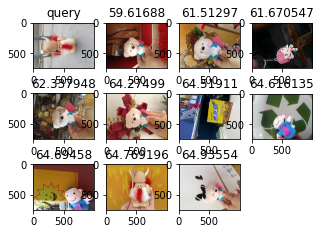

2003 54.408546
1227 60.583252
2369 61.989483
3456 64.90649
934 64.959305
2828 65.66694
988 67.47368
3306 68.857834
1332 69.58085
2792 69.593025
Q2: 2003 1227 2369 3456 934 2828 988 3306 1332 2792 


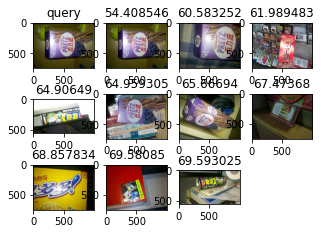

2857 44.41889
2352 51.87957
2208 52.73299
1994 53.888664
852 55.895576
3372 56.04078
147 56.060253
4227 56.754692
4660 56.95412
182 57.28539
Q3: 2857 2352 2208 1994 852 3372 147 4227 4660 182 


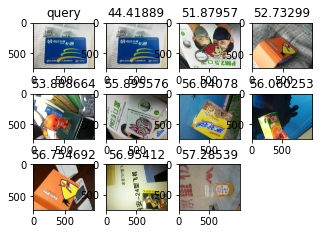

4546 63.32375
866 63.46034
1692 64.2938
4979 65.5008
4825 66.459404
3817 66.719475
1610 66.76979
3560 67.96067
4897 68.07882
4253 68.26019
Q4: 4546 866 1692 4979 4825 3817 1610 3560 4897 4253 


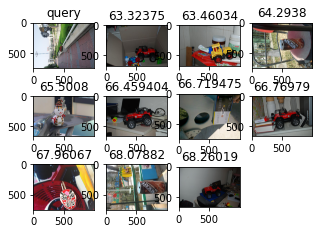

2666 71.05566
117 87.26497
1897 91.386475
3883 93.279526
2860 93.53995
4288 94.1922
3532 94.30929
3113 94.574234
880 95.03799
2389 95.64248
Q5: 2666 117 1897 3883 2860 4288 3532 3113 880 2389 


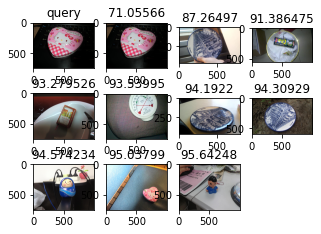

3028 69.45586
672 70.01477
2352 70.256325
1854 71.91924
1254 71.94704
4066 73.94835
1666 74.829666
4570 75.21136
2784 76.53336
2989 76.67932
Q6: 3028 672 2352 1854 1254 4066 1666 4570 2784 2989 


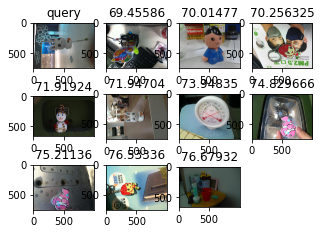

2792 49.054047
1372 51.45294
2861 51.95744
1994 54.842606
4356 55.212906
2419 55.241776
3838 56.857075
866 56.88199
852 57.29343
2942 57.581375
Q7: 2792 1372 2861 1994 4356 2419 3838 866 852 2942 


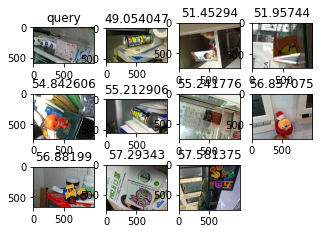

4147 72.98553
4256 74.1921
250 74.24001
4012 75.443436
1505 75.983475
1421 76.54776
3196 77.952324
3348 78.2512
3704 78.40367
2126 78.45953
Q8: 4147 4256 250 4012 1505 1421 3196 3348 3704 2126 


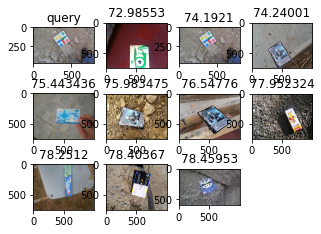

3647 66.88313
3372 68.51706
1592 69.158226
781 69.65646
1542 70.209595
837 72.0856
4568 72.38954
871 72.7294
1175 73.02078
3953 73.06373
Q9: 3647 3372 1592 781 1542 837 4568 871 1175 3953 


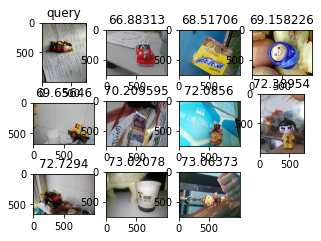

3838 53.575146
1994 56.97338
2352 57.216778
1239 57.642784
943 58.334007
2999 58.369724
3177 58.59218
4276 58.74243
2435 59.065372
2934 59.07829
Q10: 3838 1994 2352 1239 943 2999 3177 4276 2435 2934 


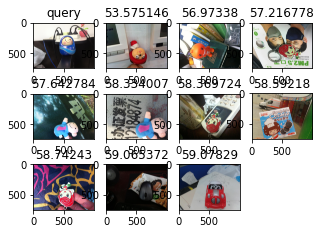

988 50.892075
3372 54.91805
852 57.300972
1506 57.4302
1367 57.90626
1439 59.04238
4227 59.248375
2268 59.81048
2942 59.923183
3089 60.143055
Q11: 988 3372 852 1506 1367 1439 4227 2268 2942 3089 


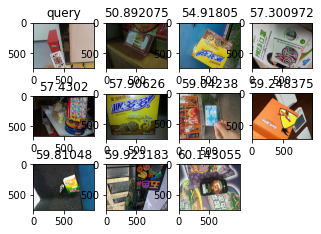

3166 85.90502
1002 85.921036
747 88.41503
3307 88.9945
291 89.63964
4325 89.70459
3896 89.86848
73 90.5724
92 90.674255
378 90.70734
Q12: 3166 1002 747 3307 291 4325 3896 73 92 378 


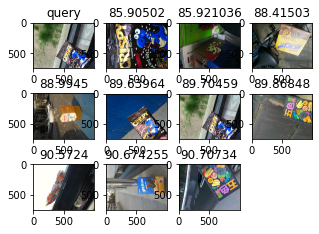

2214 68.47083
330 71.15525
4764 71.59239
182 72.84128
4846 74.15397
2832 74.30182
86 74.42993
4214 75.76655
3458 75.84516
1775 76.26755
Q13: 2214 330 4764 182 4846 2832 86 4214 3458 1775 


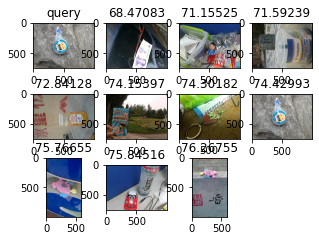

503 52.10631
1485 53.492443
3514 54.424587
2352 55.58531
4154 55.849
3631 55.87474
2989 56.532566
1179 56.70069
1038 56.909832
4279 57.072575
Q14: 503 1485 3514 2352 4154 3631 2989 1179 1038 4279 


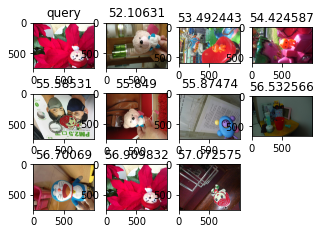

4990 78.67475
1561 79.49945
4153 80.40578
4055 80.60225
1144 81.85476
1592 82.033104
1968 82.04559
1423 82.29744
3754 82.47609
456 82.63547
Q15: 4990 1561 4153 4055 1144 1592 1968 1423 3754 456 


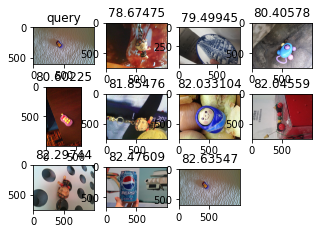

2 59.502357
1807 62.093987
4508 62.987568
1391 63.300835
1461 63.864067
3801 64.10749
1646 64.72737
2769 65.37303
2956 66.50714
4571 67.38284
Q16: 2 1807 4508 1391 1461 3801 1646 2769 2956 4571 


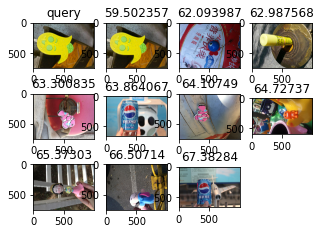

4599 61.15467
182 62.42438
2832 63.57022
2939 63.670536
882 64.64525
422 65.110405
307 65.55438
1367 65.73112
137 65.86728
4536 65.97236
Q17: 4599 182 2832 2939 882 422 307 1367 137 4536 


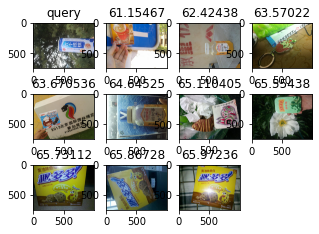

1137 52.779953
3658 58.95553
4795 59.063377
4421 59.62693
1507 59.96434
4332 60.041397
2935 60.10701
3512 60.34906
2946 60.446724
2288 60.888565
Q18: 1137 3658 4795 4421 1507 4332 2935 3512 2946 2288 


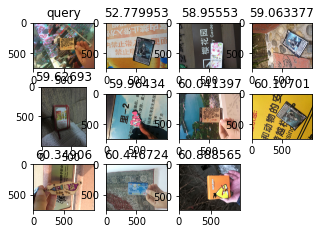

2352 57.430393
3177 59.379776
4077 59.623287
2934 59.937336
672 61.505154
1090 61.818848
1994 62.025276
3458 62.34848
3631 62.50238
3154 62.54309
Q19: 2352 3177 4077 2934 672 1090 1994 3458 3631 3154 


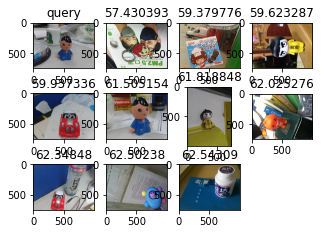

988 56.445957
1994 56.5037
829 56.512123
2352 57.071724
362 58.702595
852 59.430763
3991 59.885483
1367 60.98376
2620 61.03885
137 61.266266
Q20: 988 1994 829 2352 362 852 3991 1367 2620 137 


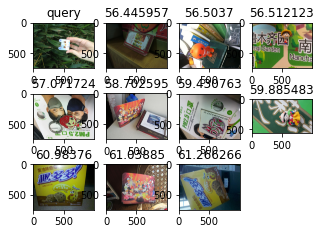

In [ ]:
queryf_dir = './datasets_4186/query_feature/'
gallery_dir = './datasets_4186/gallery_feature/'
query_dir = './datasets_4186/query_4186/'

count = 1
resultRows = []

for queryf_file in os.listdir(queryf_dir):
    best_ten = retrival_idx(os.path.join(queryf_dir, queryf_file), gallery_dir, similarityType = similarity) # retrieve top 10 matching images in the gallery.

    if similarity != 'euclidean':
        best_ten.reverse()

    rowString = "Q{}: ".format(count)

    similarImages = []
    for i in best_ten:
        print(i[0][:-4], i[1])
        rowString = rowString + i[0][:-4] + " "

    print(rowString)
    resultRows.append(rowString)
    visualization(best_ten, os.path.join(query_dir, queryf_file[:-10] + '.jpg')) # Visualize the retrieval results
    count+=1


In [ ]:
with open('/results/rankList_vgg19_{}.txt'.format(similarity),'a') as f:
    for row in resultRows:
        f.write('{}\n'.format(row))
    f.close()